In [1]:
%run -i 'init.py'

## Test Case
Non-traditional ETFs do manage to meet their daily target (2:1 or 3:1), but since they "rebalance" daily, the long-term results may be skewed. Say you have bought a 3:1-leveraged ETF that targets thrice the return of index XY. You pay \$100 to buy a share of ETF when the benchmark index is at 10,000. If index XY zooms up 10% the next day to 11,000, the leveraged ETF would increase 30% to \$130. Now, if the index falls from 11,000 back down to 10,000 the following day, there is a 9.09% decline. The leveraged ETF you are holding would __go down thrice, i.e. by 27.27%__. Now, although the index returned to the starting point, a 27.27% decline __from \$130__ would leave you with an ETF share worth just \$94.55, i.e. the ETF share is down by 5.45%.

Read more: A Guide For Buying ETFs On Margin | Investopedia https://www.investopedia.com/articles/investing/060314/guide-buying-etfs-margin.asp#ixzz5NhiSeriw 
Follow us: Investopedia on Facebook

In [2]:
fund = 10000
leverage = 3
margin = 2
Simulate_Path([0.1, -0.0909], fund, margin, leverage)

,Del (%),Nrm,Nrm ($),Nrm (%),Mrg,Mrg ($),Mrg (%),Lvg,Lvg ($),Lvg (%)
0,NaN,10000.0,NaN,NaN,30000.0,NaN,NaN,10000.0,NaN,NaN
1,10.00,11000.0,1000.0,10.000,33000.0,3000.0,30.000,13000.0,3000.0,30.000
2,-9.09,10000.1,0.1,0.001,30000.3,0.3,0.003,9454.9,-545.1,-5.451


## Historic Data
Simulate porfolio networth with real historic S&P500 index data under three different investment strategies:
1. Investing fund in normal ETF (Nrm).
2. Investing fund in normal ETF with 200% margin (3x).
3. Investing fund in 3 times leveraged ETF (Lvg).

Adjust starting date (tail_dy), ending date (head_dy), starting fund and leverage as needed

In [30]:
cwd = os.getcwd()
df_historic = pd.read_csv(os.path.join(cwd, "S&P500.csv"), sep = ',')
df_historic = df_historic[::-1]

head_dy = '2008-01-01'
tail_dy = '2018-08-09'

# or get current date
# tail_dy = datetime.today().strftime('%Y-%m-%d')

df_historic = df_historic[(df_historic["Date"] > head_dy) & (df_historic["Date"] < tail_dy)]
df_historic = df_historic.set_index("Date")

In [31]:
fund = 10000
leverage = 3
margin = 2
df_path = Simulate_Path(df_historic["Change %"], fund, margin, leverage)

df_path = df_path[1:]
df_path["Date"] = df_historic.index.values
df_path = df_path.set_index("Date")
title = "Investing $%i in %s ~ %s"%(fund, df_path.index.values[0], df_path.index.values[-1])

In [32]:
df_path[:5]

,Del (%),Nrm,Nrm ($),Nrm (%),Mrg,Mrg ($),Mrg (%),Lvg,Lvg ($),Lvg (%)
Date,,,,,,,,,,
2008-01-02,-1.44,9856.000000,-144.000000,-1.440000,29568.000000,-432.000000,-4.320000,9568.000000,-432.000000,-4.320000
2008-01-03,0.00,9856.000000,-144.000000,-1.440000,29568.000000,-432.000000,-4.320000,9568.000000,-432.000000,-4.320000
2008-01-04,-2.46,9613.542400,-386.457600,-3.864576,28840.627200,-1159.372800,-11.593728,8861.881600,-1138.118400,-11.381184
2008-01-07,0.32,9644.305736,-355.694264,-3.556943,28932.917207,-1067.082793,-10.670828,8946.955663,-1053.044337,-10.530443
2008-01-08,-1.84,9466.850510,-533.149490,-5.331495,28400.551530,-1599.448470,-15.994485,8453.083711,-1546.916289,-15.469163


In [33]:
df_path[-5:]

,Del (%),Nrm,Nrm ($),Nrm (%),Mrg,Mrg ($),Mrg (%),Lvg,Lvg ($),Lvg (%)
Date,,,,,,,,,,
2018-08-02,0.49,19224.965501,9224.965501,92.249655,57674.896502,27674.896502,276.748965,19123.079474,9123.079474,91.230795
2018-08-03,0.46,19313.400342,9313.400342,93.134003,57940.201026,27940.201026,279.402010,19386.977970,9386.977970,93.869780
2018-08-06,0.35,19380.997243,9380.997243,93.809972,58142.991729,28142.991729,281.429917,19590.541239,9590.541239,95.905412
2018-08-07,0.28,19435.264035,9435.264035,94.352640,58305.792106,28305.792106,283.057921,19755.101786,9755.101786,97.551018
2018-08-08,-0.03,19429.433456,9429.433456,94.294335,58288.300368,28288.300368,282.883004,19737.322194,9737.322194,97.373222


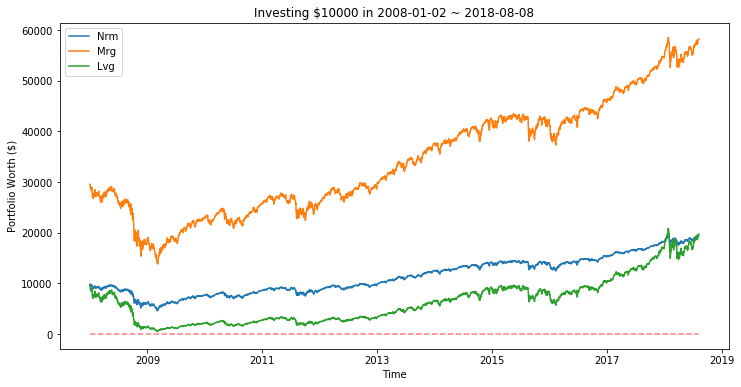

In [34]:
Plot_3(df_path, [key_nrm, key_mrg, key_lvg],
      "Time", "Portfolio Worth ($)", title, save = True)

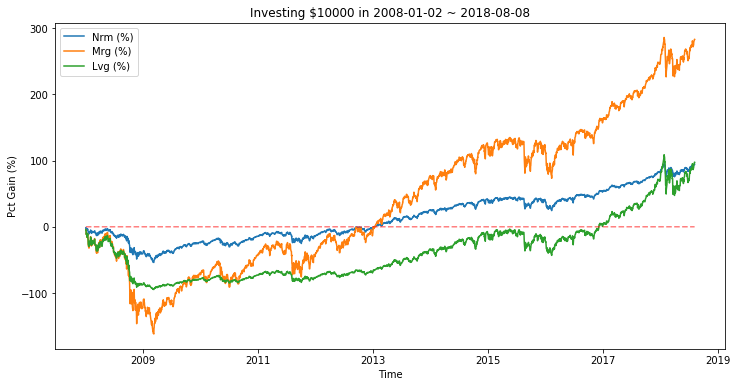

In [35]:
Plot_3(df_path, [key_pctn, key_pctm, key_pctl],
      "Time", "Pct Gain (%)", title, save = True)

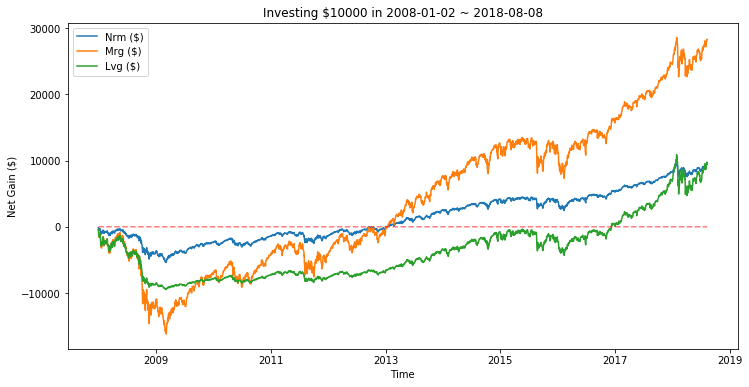

In [36]:
Plot_3(df_path, [key_netn, key_netm, key_netl],
      "Time", "Net Gain ($)", title, save = True)

## Cash-out

In [37]:
df_out = pd.DataFrame(columns = [key_nrm, key_mrg, key_lvg])
df_out[key_nrm] = df_path[key_nrm]
df_out[key_mrg] = df_path[key_mrg] - fund * margin
df_out[key_lvg] = df_path[key_lvg]

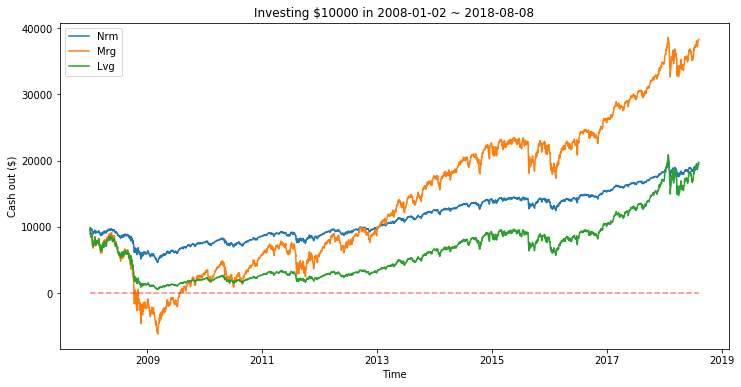

In [38]:
Plot_3(df_out, [key_nrm, key_mrg, key_lvg],
      "Time", "Cash out ($)", title, save = True)